In [1]:
import sys
import os
build_path = os.path.join(os.getcwd(), "..", "build")
!cmake -B {build_path} -DPYTHON_EXECUTABLE={sys.executable} -Wno-dev ..
!cmake --build {build_path}
if build_path not in sys.path:
    sys.path.append(build_path)
import pypumila
# to reload pypumila, restart python kernel.
# importlib.reload(pypumila) <- does not work

-- Eigen3 found
-- SDL2 and SDL2TTF found
-- Fetching pybind11 source...
-- pybind11 v2.11.1 
-- Fetching BS::thread_pool source...
-- Fetching roboto font...
-- Configuring done
-- Generating done
-- Build files have been written to: /home/kou/projects/pumila/build
Consolidate compiler generated dependencies of target pumila
[ 66%] Built target pumila
Consolidate compiler generated dependencies of target pypumila
[ 83%] Built target pypumila
Consolidate compiler generated dependencies of target pumila-play
[100%] Built target pumila-play


In [2]:
os.chdir(build_path)
sim = pypumila.GameSim()

In [3]:
# while True:
#     window.step(True, True)

In [4]:
# window.quit()

In [5]:
import numpy as np

In [6]:
from tqdm.notebook import tqdm

In [7]:
import random

In [ ]:
model = pypumila.Pumila1.make_shared(0.01, 0.9, 0.01)
model_first = model.copy()
rewards = []
diffs = []
scores = []
for e in tqdm(range(3000)):
    sim = pypumila.GameSim()
    while max([sim.field.get_height(x) for x in range(6)]) < 12:
        a = model.get_action_rnd(sim.field)
        model.learn_step(sim.field)
        diff = model.mean_diff
        sim.put(pypumila.actions[a])
        while not sim.is_free_phase():
            sim.step()
        reward = pypumila.Pumila1.calc_reward(sim.field)
        rewards.append(reward)
        diffs.append(diff)
        # このdiffはだいぶ前の学習結果で使ったdiffなので参考にならない
        print(f"a = {a}, reward = {reward}, chain = {sim.field.prev_chain_num}, diff = {diff}")
    print("reset sim")
    scores.append(sim.field.total_score)

In [9]:
import matplotlib.pyplot as plt

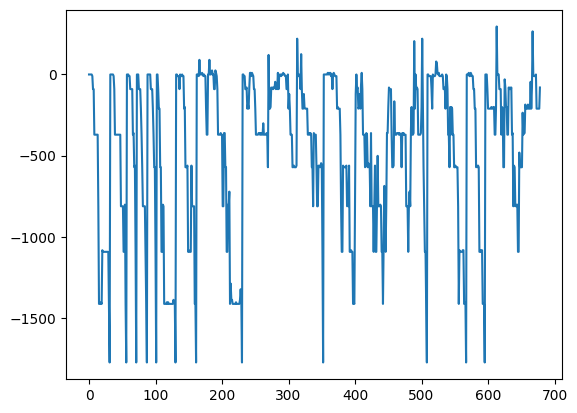

In [10]:
plt.plot(rewards)

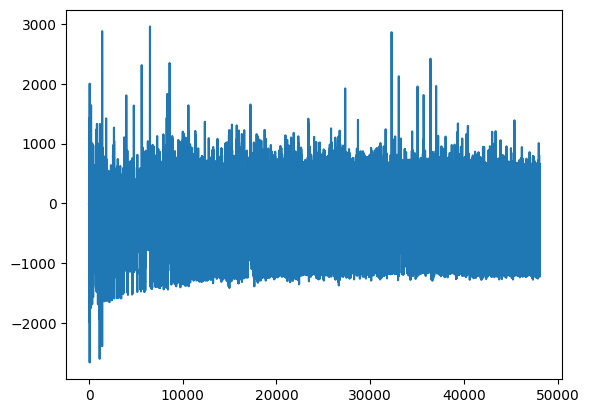

In [32]:
plt.plot(diffs)

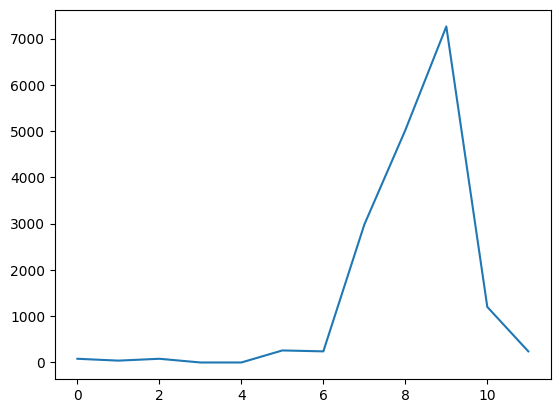

In [11]:
plt.plot(scores)

In [12]:
sim = pypumila.GameSim()
win = pypumila.Window(sim)
win.step(False, False)

In [13]:
for e2 in range(50):
    a = model.get_action(sim)
    sim.put(pypumila.actions[a])
    while not sim.is_free_phase():
        # sim.step()
        win.step(True, False)
    for i in range(30):
        win.step(True, False)
    # print_sim()

In [14]:
win.quit()

In [62]:
sim = pypumila.GameSim()
win2 = pypumila.Window(sim)
for e2 in range(20):
    q = model_first.forward(sim)
    a = np.argmax(np.array(q))
    sim.put(pypumila.actions[a])
    while not sim.is_free_phase():
        # sim.step()
        win2.step(True, False)
    for i in range(30):
        win2.step(True, False)

In [39]:
win2.quit()